In [1]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Histogram-based segmentation

Histogram-based methods are very efficient compared to other image segmentation methods because they typically require only one pass through all the pixels of the image. In this technique, a histogram is computed from all of the pixels, and the peaks and valleys in the histogram are used to locate the clusters in the image. Color or intensity can be used as the measure. A refinement of this technique is to recursively apply the histogram-seeking method to the clusters defined in the image in order to divide them into smaller clusters. This operation is repeated with smaller and smaller clusters until no more clusters are formed. One disadvantage of the histogram-seeking method is that it may be difficult to identify significant peaks and valleys in the image. All the pixels in the image are processed the same way : its a common method, easy and fast, and used when pixel value has a direct interpretation.
> Let's take the example of the Hounsfield Unit in a CT scan. The Hounsfield unit $\textrm{HU}$ scale is a linear transformation of the original linear attenuation coefficient measurement into one in which the radiodensity of distilled water at standard pressure and temperature is defined as $0 \textrm{HU}$, while the radiodensity of air at at standard pressure and temperature is defined as $−1000 \textrm{HU}$. In a voxel with average linear attenuation coefficient $\mu$, the corresponding HU value is therefore given by the following equation :
> $$\textrm{HU} = 1000 \cdot \frac{\mu - \mu _{\textrm{water}}}{\mu _{\textrm{water}} - \mu _{\textrm{air}}}$$
> where $\mu _{\textrm {water}}$ and $\mu _{\textrm {air}}$ are respectively the linear attenuation coefficients of water and air.
> 
> Thus, a change of $1 \textrm{HU}$ represents a change of 0.1% of the attenuation coefficient of water since the attenuation coefficient of air is nearly zero. Below are listed some examples of substances density expressed in $\textrm{HU}$.
> |Material|Radiodensity $\left[\textrm{HU}\right]$|
> |:--|:--|
> |Air|-1000|
> |Lung|-700|
> |Soft tissue|-300 to -100|
> |Fat|-50|
> |Water|0|
> |Cerebral spinal fluid|+15|
> |Blood|+30 to +45|
> |Muscle|+40|
> |Calculus|+100 to +400|
> |Bone|+1000 and up to +3000 fo dense bones|
> 
> |Illustration of tissue densities in a CT scan|
> |:-:|
> |<img src="http://crashingpatient.com/wp-content/images/part1/tissuedensities.jpg" alt="Illustration of tissue densities in a CT scan" title="Illustration of tissue densities in a CT scan" width="600"/>|

A problem in the segmentation can arise for several reasons :
- the illumination is uneven,
- in presence of shadows,
- when the object of interest has a variable brightness or texture,
- ...

## Image threshold

The simple definition of a threshold is given by the next system.
$$
g(i,j) = 
\begin{cases} 
     = 1 & \textrm{if } f(i,j)>T \\
     = 0 & \textrm{otherwise}
\end{cases}
$$
The threshold $T$ can be of different natures :
* fixed: $T = T_0$,
* globally adaptive: $T = T(f)$,
* locally adaptive: $T = T(f,fc)$.

The next codes propose several examples of such thresholds in histogram-based segmentation techniques.

In [3]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level');

C:\Program Files\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(array([43412, 87788,     0,     0,     0,     0,     0,     0,     0],
       dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

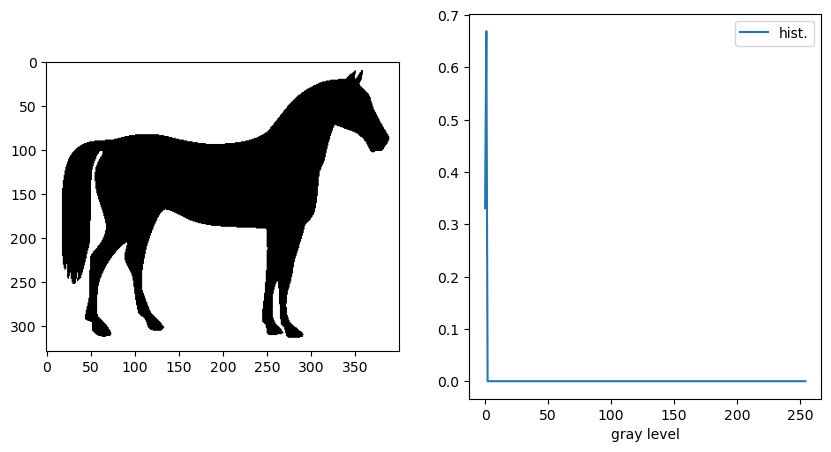

In [4]:
g = data.horse()[:].astype(np.uint8)
display_hist(g)
h = np.histogram(g,range(10))
h

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


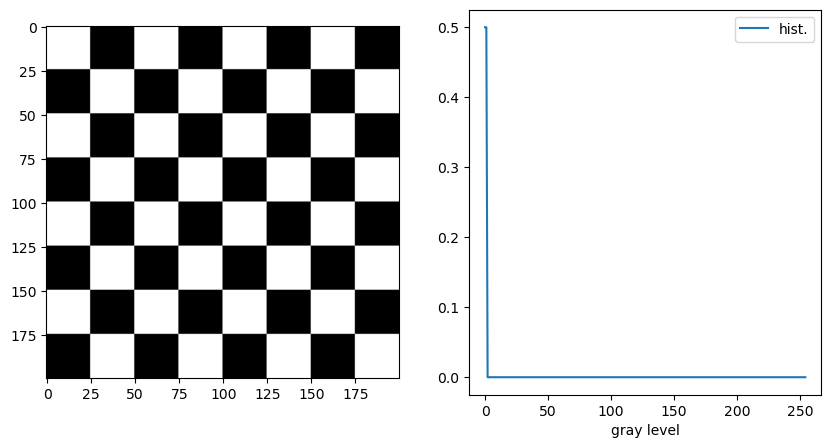

In [5]:
display_hist(data.checkerboard()>128)

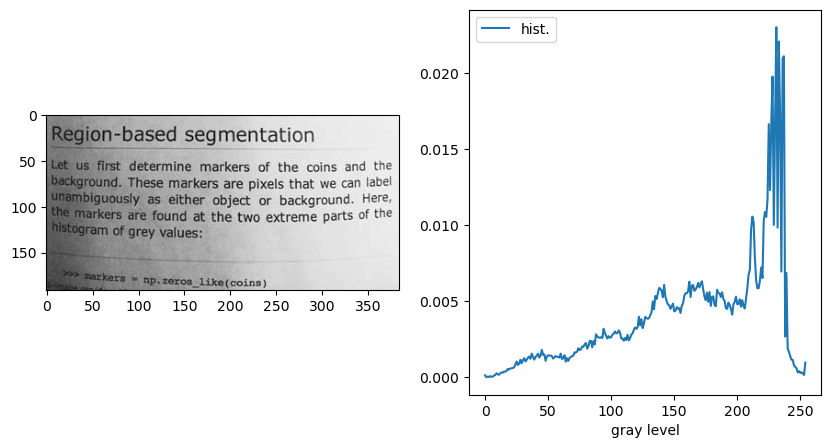

In [6]:
display_hist(data.page())

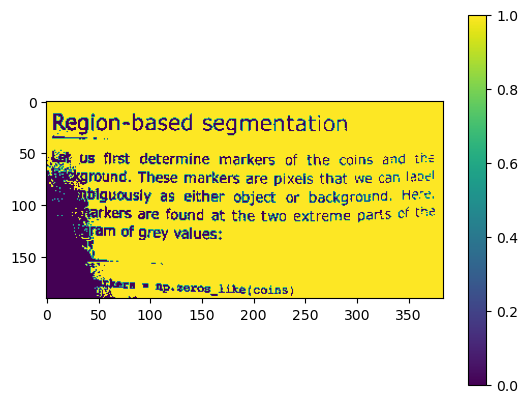

In [7]:
g = data.page()
t = g>110
plt.imshow(t)
plt.colorbar()

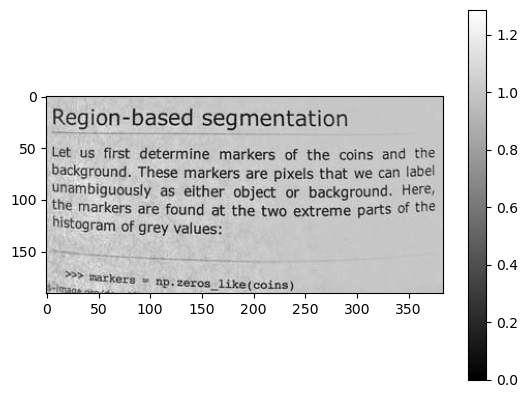

In [8]:
from skimage.filters import rank as skr
from skimage.morphology import disk

g = data.page()
m = skr.median(g,disk(15))
d = g/m
plt.imshow(d,cmap=plt.cm.gray)
plt.colorbar()

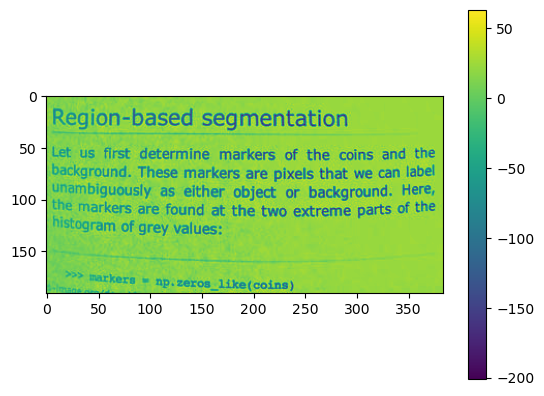

In [9]:
from skimage.filters import rank as skr

m = skr.median(g,disk(12))
p = g-.9*m

plt.imshow(p)
plt.colorbar()

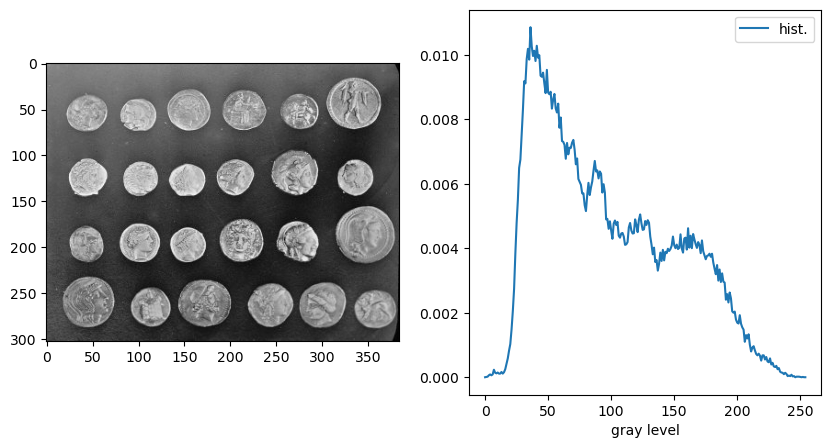

In [10]:
display_hist(data.coins())

uint8


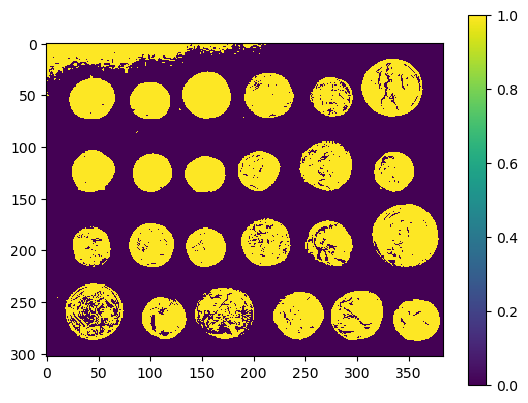

In [11]:
g = data.coins()
t = (g>120).astype(np.uint8)
plt.imshow(t,interpolation='nearest')
plt.colorbar()
print(t.dtype)

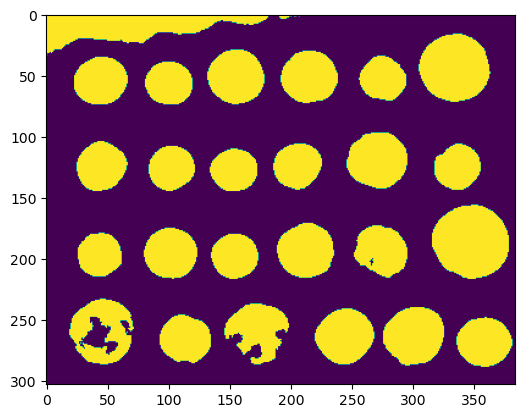

In [12]:
m= skr.median(t,disk(5))
plt.imshow(m)

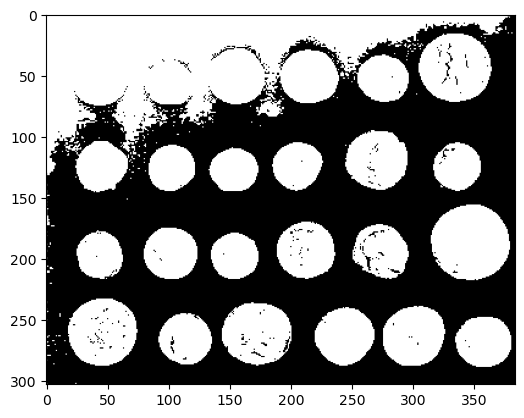

In [13]:
g = data.coins()
t = (g>90).astype(np.uint8)
m = skr.median(t,disk(5))
plt.imshow(t,cmap=plt.cm.gray)

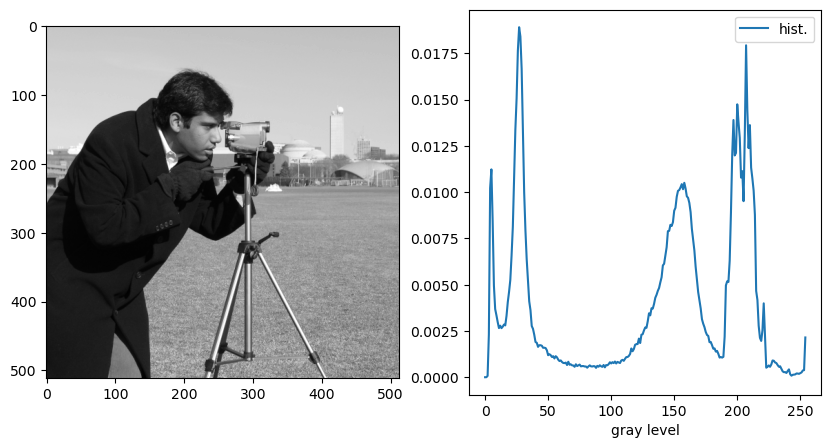

In [14]:
display_hist(data.camera())

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

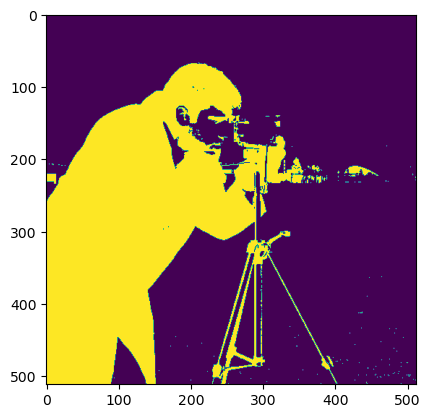

In [15]:
g = data.camera()
t1 = (g>150).astype(int)
t2 = (g>200).astype(int)
t3 = t1+t2
t = g<100
plt.imshow(t)
t3

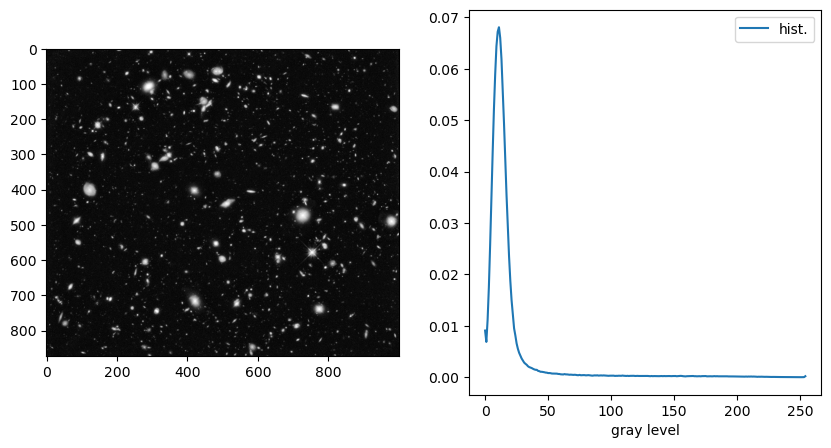

In [16]:
display_hist(data.hubble_deep_field()[:,:,0])

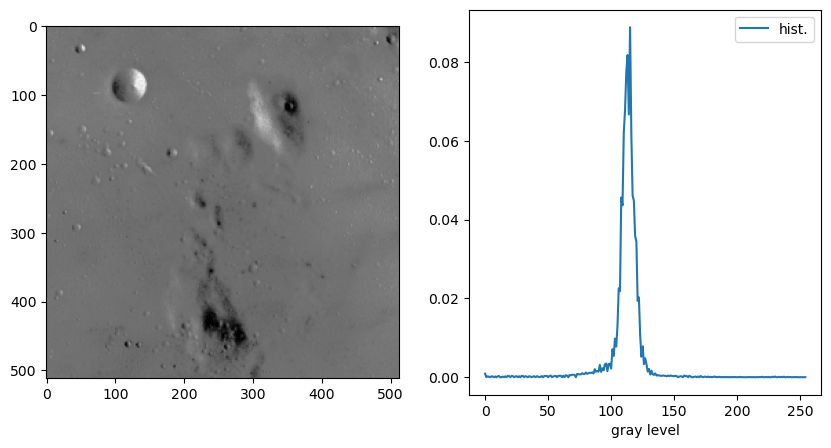

In [17]:
display_hist(data.moon())

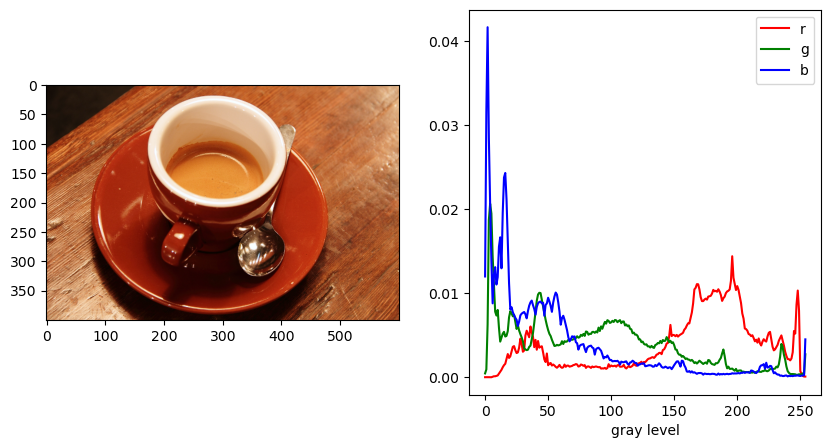

In [18]:
display_hist(data.coffee())

## Percentile threshold

The percentile threshold is simply a fixed threshold based on the percentile of the cumulative histogram of an image. An example with an image of galaxies is given below : if the surface of the object of interest is a priori known, here the galaxies, the threshold can be set to the corresponding percentile. In this case, the galaxies are the 5% brighter pixels in the image, so the threshold is put at 95%.

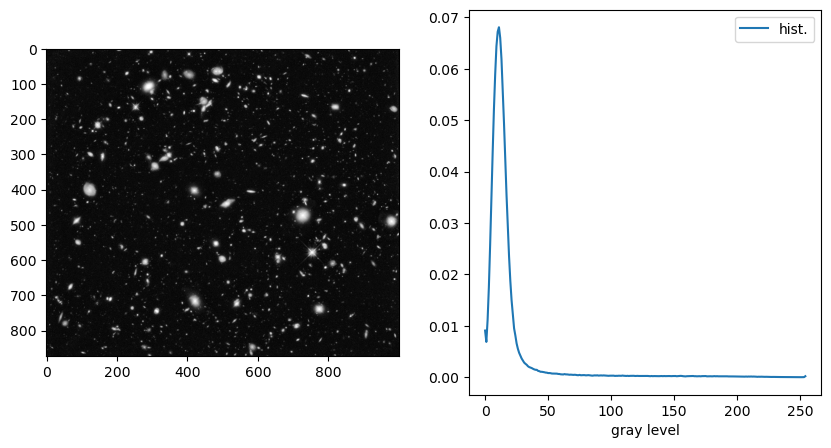

In [19]:
ima = data.hubble_deep_field()[:,:,0]
display_hist(ima)

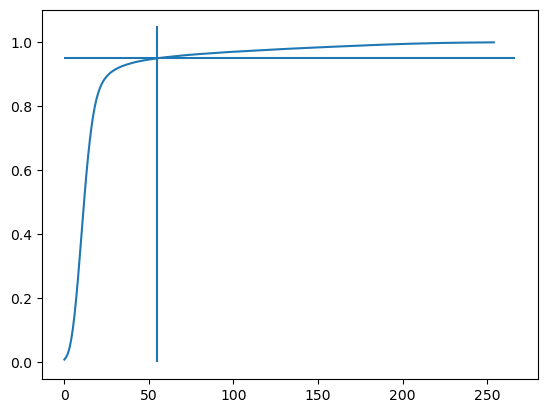

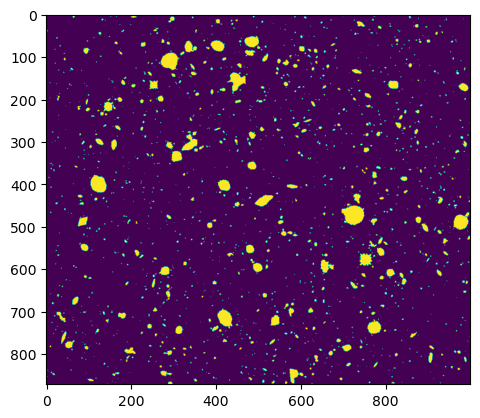

In [20]:
perc = .95 #galaxies are the 5% brighter pixels in the image

h,bins = np.histogram(ima[:],range(256))

c = 1.*np.cumsum(h)/np.sum(h)
plt.plot(c)

plt.gca().hlines(perc,0,plt.gca().get_xlim()[1]);

th_perc = np.where(c>=perc)[0][0]

plt.gca().vlines(th_perc,0,plt.gca().get_ylim()[1]);
plt.figure()
plt.imshow(ima>=th_perc);

## Optimal threshold

The algorithm followed to find the optimal threshold for an image is given by the following steps.
1. Setting of an initial threshold $T$.
2. Cutting of the distribution into two parts :
    - $G_1 = \left\{p(x,y) > T \right\}$,
    - $G_2 = \left\{p(x,y)\leq T \right\}$.
3. Computation of the distribution centroid for each part, $m_1$ and $m_2$.
4. Computation of the new threshold : $T’= \frac{(m_1 + m_2)}{2}$.
5. Iteration of steps 2 $\rightarrow$ 4 until convergence.

## Otsu's threshold

Two classes are defined based on pixel intensity, for example foreground and background. The classes are then separated by a threshold value $k$. The classes' probabilities are defined by the following system.
$$
\begin{cases} 
    \omega_0 &= P(C_0) = \displaystyle\sum_{i=0}^k p_i  = \omega (k)\\
    \omega_1 &= P(C_1) = \displaystyle\sum_{i=k+1}^L p_i  = 1-\omega (k)
\end{cases} 
$$
The classes' means can also be defined, and that by the next system.
$$
\begin{cases} 
    \mu_0 &= \displaystyle\sum_{i=0}^k i \ P(i \ | \ C_0) = \displaystyle\sum_{i=0}^k i \ \frac{p_i}{\omega _0} = \frac{\mu (k)}{\omega (k)} \\
    \mu_1 &= \displaystyle\sum_{i=k+1}^L i \ P(i \ | \ C_1) = \displaystyle\sum_{i=k+1}^L i \ \frac{p_i}{\omega _1} = \frac{\mu_T - \mu(k)}{1-\omega(k)}
\end{cases} 
$$

with $\mu(k) = \displaystyle\sum_{i=0}^k i \ p_i$ for the threshold value $k$ and $\mu_T = \mu(L) = \displaystyle\sum_{i=0}^L i \ p_i$ for the total image. Total image values and class values are linked by the following system.
$$
\begin{cases} 
    \omega _0 \ \mu _0 + \omega _1 \ \mu _1 = \mu _T\\
    \omega _0 + \omega _1 = 1
\end{cases} 
$$
The class variances are defined by the next system.
$$
\begin{cases} 
    \sigma _0^2 = \displaystyle\sum _{i=0}^k (i-\mu _0)^2 \ P(i \ | \ C_0) = \displaystyle\sum_{i=0}^k (i-\mu _0)^2 \frac{p_i}{\omega _0} \\
    \sigma _1^2 = \displaystyle\sum _{i=k+1}^L (i-\mu _1)^2 \ P(i \ | \ C_1) = \displaystyle\sum_{i=k+1}^L (i-\mu _1)^2 \frac{p_i}{\omega _1}
\end{cases} 
$$
Several variances can also be computed for an image :
- the intra-class variance ($W$ for "within") : $\sigma _W^2 = \omega _0 \ \sigma _0^2 + \omega _1 \ \sigma _1^2$,
- the inter-class variance ($B$ for "between") : $\sigma _B^2 = \omega _0 \ (\mu _0 - \mu _T)^2 + \omega_1 \ (\mu _1-\mu _T)^2 = \omega _0 \ \omega _1 \ (\mu _1-\mu _0)^2$,
- the total variance : $\sigma _T^2 = \displaystyle\sum _{i=0}^L (i-\mu _T)^2 \ p_i$

Another value, called separability, can be computed by the next equation.
$$
\lambda = \frac{\sigma _B^2}{\sigma _W^2} \ , \ \kappa = \frac{\sigma _T^2}{\sigma _W^2} \ , \ \eta = \frac{\sigma _B^2}{\sigma _T^2}
$$
The Otsu's threshold chosen such that the separability is maximal, for example $\eta = \frac{\sigma _B^2}{\sigma _T^2} > \lambda = \frac{\sigma _B^2}{\sigma _W^2} > \kappa = \frac{\sigma _T^2}{\sigma _W^2}$


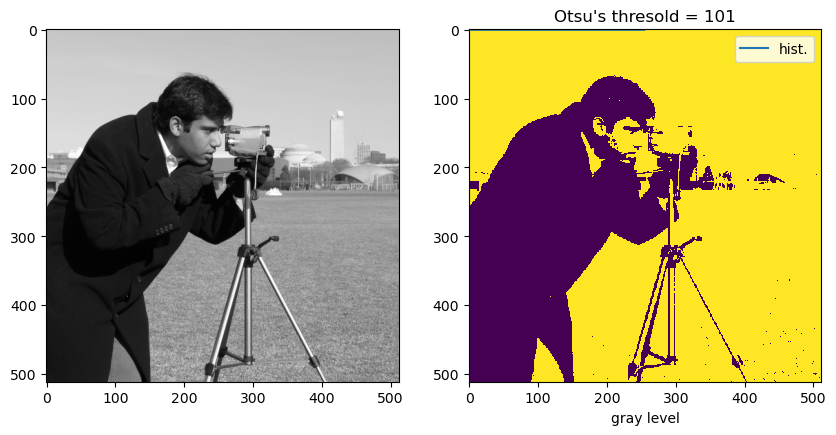

In [21]:
from skimage.filters import threshold_otsu

ima = 255*(1-data.camera())
th = threshold_otsu(ima)
display_hist(ima)
plt.gca().vlines(th,0,plt.gca().get_ylim()[1]);
plt.title("Otsu's thresold = %d"%th );
plt.imshow(ima>th,interpolation='nearest')

## Entropy threshold

The threshold is chosen to be the value maximizing the total entropy, which is the sum of the two subspaces entropies below and above the threshold. As a reminder, the definition of the entropy is given by the equation below.
$$
e = - \sum p \ \log_2 \left( p \right)
$$
where $p$ is the probability of occurence for one gray level in one specific subspace.

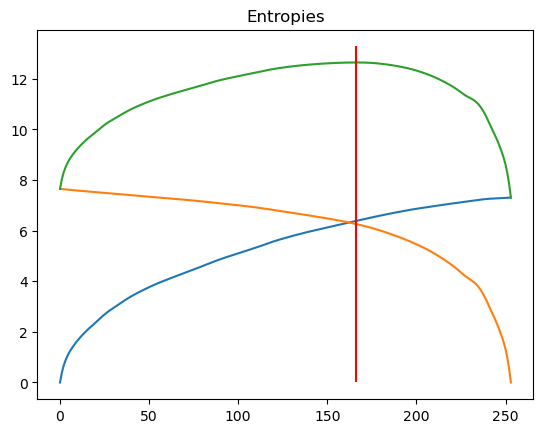

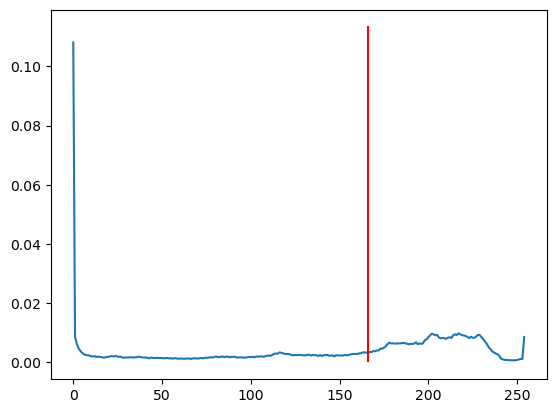

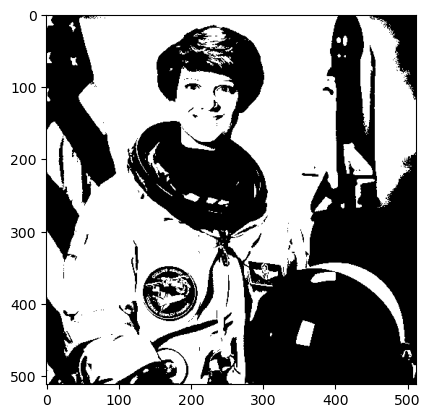

In [31]:
ima = data.astronaut()[:,:,0]

h,_ = np.histogram(ima[:],range(256))
h = h/h.sum() # normalized histogram

def entropy(symb,freq):
    idx = np.asarray(freq) != 0
    s = np.sum(freq)
    p = 1. * freq/s
    e = - np.sum(p[idx] * np.log2(p[idx]))
    return e

e0 = []
e1 = []

for g in range(1,255):
    e0.append(entropy(range(0,g),h[:g]))
    e1.append(entropy(range(g,255),h[g:255]))

e0 = np.asarray(e0)
e1 = np.asarray(e1)

e_max = np.argmax(e0+e1)
fig = plt.figure()
plt.plot(e0)
plt.plot(e1)
plt.plot(e0+e1)
plt.gca().vlines(e_max,0,plt.gca().get_ylim()[1], color="red");
plt.title("Entropies")

plt.figure()
plt.plot(h)
plt.gca().vlines(e_max,0,plt.gca().get_ylim()[1], color="red");
plt.figure()
plt.imshow(ima>e_max,cmap=plt.cm.gray);

## Multi-spectral threshold

For multi-spectral images, for example RGB or HSV images, each spectral plane could be considered independently and the obtained segmentations could be grouped. The following example applies an Otsu's threshold on each color frame and makes a combination of the segmented results.

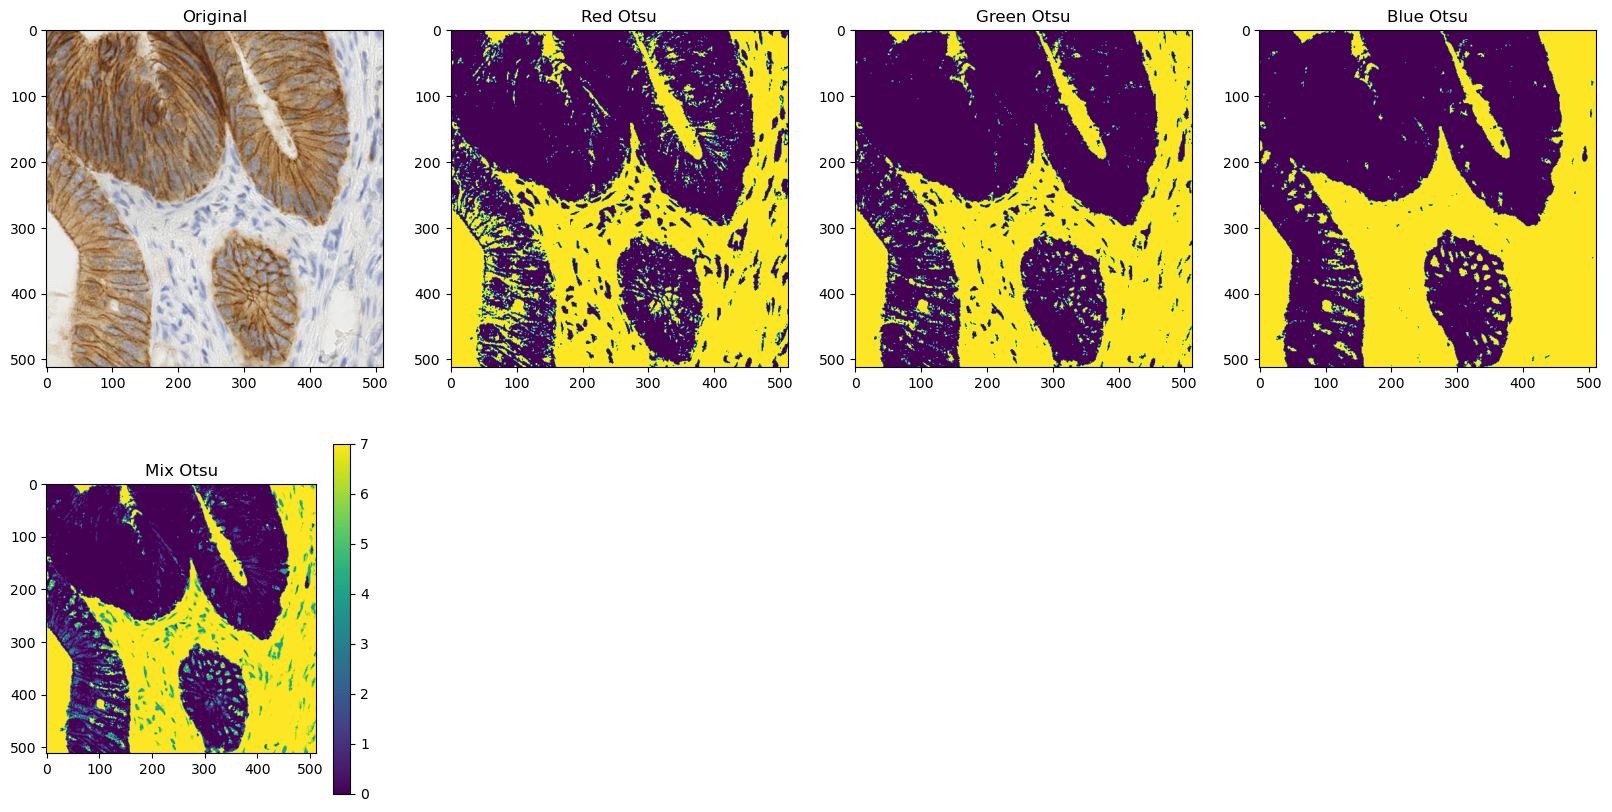

In [41]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2hsv

rgb = data.immunohistochemistry()

r = rgb[:,:,0]
g = rgb[:,:,1]
b = rgb[:,:,2]

th_r = threshold_otsu(r)
th_g = threshold_otsu(g)
th_b = threshold_otsu(b)

mix = (r>th_r).astype(np.uint8) + 2 * (g>th_g).astype(np.uint8) + 4 * (b>th_b).astype(np.uint8)

plt.figure(figsize=[20,10])
plt.subplot(2,4,1)
plt.imshow(rgb)
plt.title("Original")
plt.subplot(2,4,2)
plt.imshow(r>th_r)
plt.title("Red Otsu")
plt.subplot(2,4,3)
plt.imshow(g>th_g)
plt.title("Green Otsu")
plt.subplot(2,4,4)
plt.imshow(b>th_b)
plt.title("Blue Otsu")
plt.subplot(2,4,5)
plt.imshow(mix)
plt.title("Mix Otsu")
plt.colorbar();

## Adding spectral dimensions

Sometimes the gray level information is not enough to segment the image. The following example clearly presents three regions with different average gray level. Howerver, a variable texture in the central part of the image can also be distinguished : the texture is more coarse than on the lateral borders. The gray level histogram, plotted afterwards, exhibits three peaks corresponding to the three gray levels present in the image.

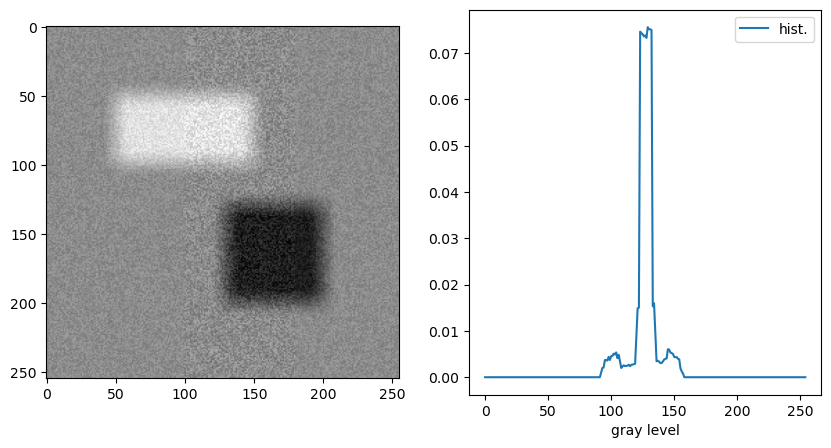

In [47]:
import skimage.filters.rank as skr
from skimage.morphology import disk

ima = (128*np.ones((255,255))).astype(np.uint8)
ima[50:100,50:150] = 150
ima[130:200,130:200] = 100

ima = skr.mean(ima,disk(10))

mask = 10.*np.ones_like(ima)
mask[:,100:180] = 15
# add variable noise

n = np.random.random(ima.shape)-.5
ima = (ima + mask*n).astype(np.uint8)


entropy = 255.*skr.entropy(ima,disk(4))/8

display_hist(ima)

In order to detect the variation of noise inside the central part of the objects, a local entropy measurement can be used. A clear contrast between the central band and the left and right borders of the image can be observd. Entropy is also sensitive to sharp gray level variation, so the box borders are also emphasized.

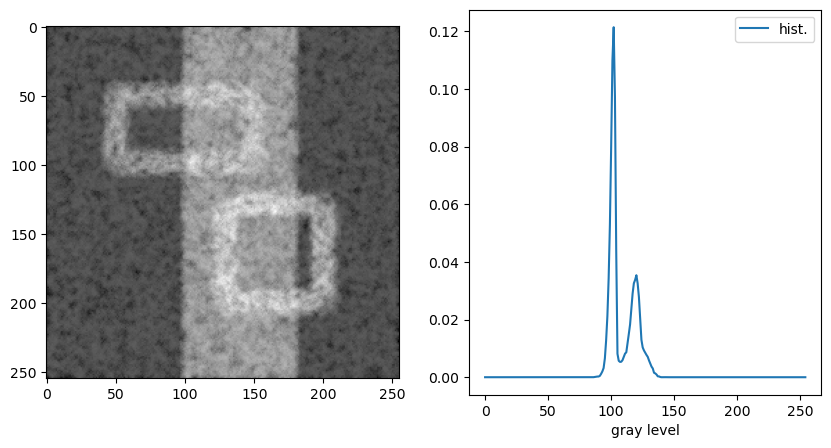

In [50]:
display_hist(entropy)

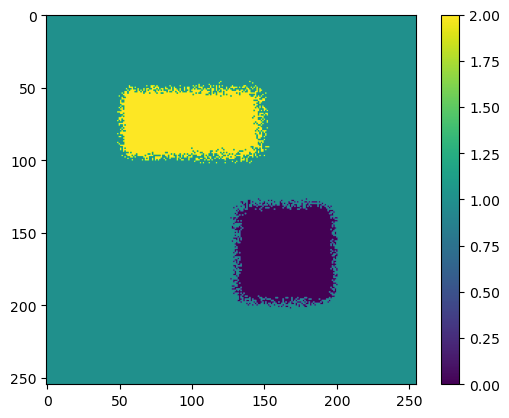

In [51]:
r = np.zeros_like(ima)
r[ima>110] = 1
r[ima>140] = r[ima>140]+1

plt.imshow(r)
plt.colorbar();

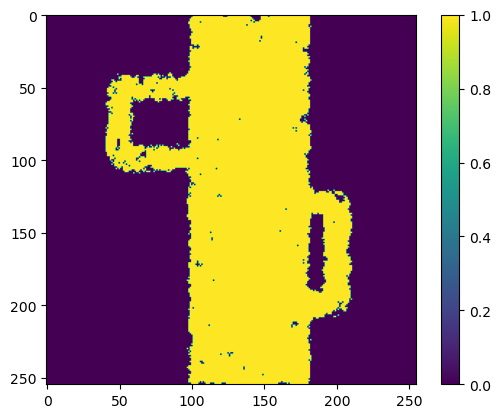

In [52]:
s = np.zeros_like(entropy)
s[entropy>110] = 1
s[entropy>140] = 0
plt.imshow(s)
plt.colorbar();

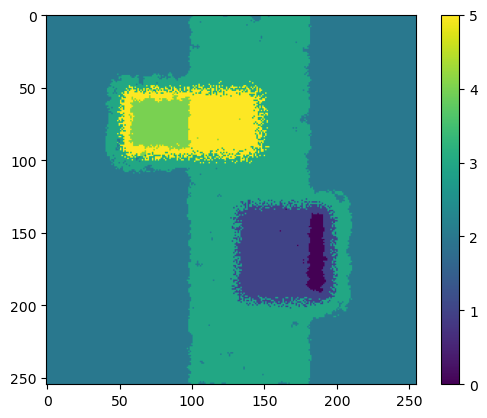

In [53]:
plt.imshow(s+2*r)
plt.colorbar()